In [149]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.fftpack
from matplotlib import cm
from matplotlib.ticker import FuncFormatter, MultipleLocator, LinearLocator, FormatStrFormatter
import scipy.fftpack
from matplotlib import collections as matcoll


In [150]:
x = np.arange(0,10,1/10000)
vis = 0.180
t = 0.2
n = np.arange(1,20,1)
coeff =[0 for i in range(np.size(n))]
cutCoeff  =[0 for i in range(np.size(n))]
f1=20
f2=19
w=2*np.pi

In [151]:
for i in range(np.size(n)):
        coeff[i]= integrate.quad(lambda x: np.exp(-1/(4*vis*np.pi)*(1-np.cos(x)))*np.cos(i*x),\
        0,np.pi*2)


In [152]:
a0 = integrate.quad(lambda x: np.exp((-1/(4*vis*np.pi*1))*(1-np.cos(x))), 0,2*np.pi)

In [153]:
for i in range(np.size(n)):
    cutCoeff[i] = coeff[i][0]

In [162]:
def u(x): 
    out = (2 +4*np.pi*vis\
           *((cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.sin(1*x*f1)\
           + cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.sin(2*x*f1)\
           + cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.sin(3*x*f1)\
           + cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.sin(4*x*f1)\
           + cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.sin(5*x*f1))\
                                    /                         \
          (a0+(cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.cos(1*x*f1)\
          +cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.cos(2*x*f1)\
          +cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.cos(3*x*f1)\
          +cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.cos(4*x*f1)\
          +cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.cos(5*x*f1))))) \
                *                       \
            (2 +4*np.pi*vis\
           *((cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.sin(1*x*f2)\
           + cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.sin(2*x*f2)\
           + cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.sin(3*x*f2)\
           + cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.sin(4*x*f2)\
           + cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.sin(5*x*f2))\
                                    /                         \
          (a0+(cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.cos(1*x*f2)\
           + cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.cos(2*x*f2)\
           + cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.cos(3*x*f2)\
           + cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.cos(4*x*f2)\
           + cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.cos(5*x*f2))))) 
    
    return out

In [163]:
tempValue =[0 for i in range(np.size(x))]
cutValue =[0 for i in range(np.size(x))]

In [164]:
for i in range(np.size(x)):
    tempValue[i] = u(x[i])

In [165]:
for i in range(np.size(x)):
    cutValue[i] = tempValue[i][0]

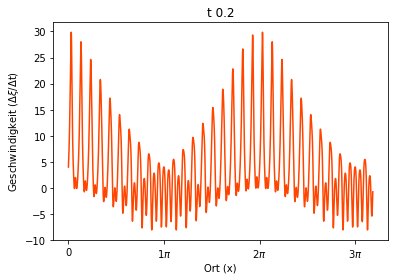

In [166]:
color=iter(cm.twilight(np.linspace(0,1,1000)))
fig, ax = plt.subplots()
ax.plot(x, cutValue, c='orangered')
    
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.set(xlabel='Ort (x)', ylabel='Geschwindigkeit ($\\Delta\\xi$/$\\Delta$t)',
       title="t " +  str(t))
#ax.set_ylim([0,6])
#ax.set_xlim([0,5])
fig.savefig("AM.png", dpi=300)
plt.show()

In [167]:
yf = np.fft.fft(cutValue)

In [168]:
print(np.size(yf))
N = np.size(cutValue)
Nf = 5000
k = np.linspace(0,5000,Nf)
ujjx = np.arange(0,500,500)
print(np.size(Nf))
print(np.size(x))
print(np.size(x))

100000
1
100000
100000


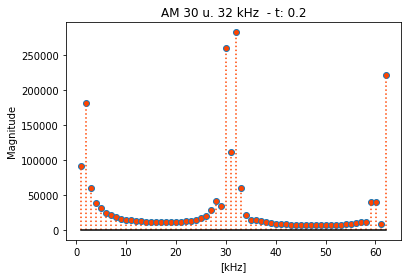

In [169]:
fig, ax = plt.subplots()
markerline, stemlines, baseline = plt.stem( k[1:Nf-4937],np.abs(yf[1:N-99937]),linefmt='orangered', markerfmt='o', bottom=1.1)  

ax.tick_params(axis='x', colors='black')

plt.setp(stemlines, 'linestyle', 'dotted')
markerline.set_markerfacecolor('orangered')
plt.setp(baseline, c='black')
ax.set(xlabel='[kHz]',ylabel="Magnitude", title="AM 30 u. 32 kHz  - t: " + str(t))
fig.savefig("SpektAM.png", dpi=300)
plt.show()

In [713]:
print(cutCoeff)

[4.237859111907018, 0.914607334075653, 0.10027301032897729, 0.00735851057944866, 0.00040565752906006683, 1.790487159114562e-05, 6.588750680255884e-07, 2.0788068808008653e-08, 5.740066781265152e-10, 1.4091301910046372e-11, 3.1125102495366264e-13, 4.593547764386585e-15, -3.0116967947302342e-15, -1.3322676295501878e-15, -2.8449465006019636e-16, 1.061650767297806e-15, 4.303198422594967e-16, 9.54097911787244e-16, 8.656270145124267e-16]


In [197]:
A = np.exp(-vis*5*5*0)

In [182]:
print(A)

1.0
